> 
# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> No-show-appointment is a dataset collected from patients who toke an appointment from their doctors in Brazil. There were ones who showed up for the appointment and others who didn't.
> This dataset containes 14 columns:
1. Patient id
2. Appointment id
3. Gender
4. Scheduled day
5. Appontment day
6. Age
7. Neighbourhood: location of the hospital
8. Scholarship: indicates
whether or not the patient is
enrolled in Brasilian welfare
program
9. Hypertension
10. Diabetes
11. Alcoholism
12. Handicap
13. SMS recevied
14. No show: Yes for people who didn't show, No for people who showed


### Question(s) for Analysis
>Factors affecting the adherence of patients to their medical appointment?

> What can be done to enhance patients' adherence to their scheduled appointment?

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> load the data and check for cleanliness


In [88]:
labels = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show']
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv', header=0, names=labels)
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [90]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [91]:
df.isnull().sum().sum()

0

There is no null values

In [92]:
df.duplicated().sum()

0

There is no duplicated values


### Data Cleaning


In [93]:
df['arrived'] = df['No_show']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
arrived           110527 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


In [94]:
df['arrived'] = df['arrived'].replace(to_replace='No', value='arrived')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,arrived
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,arrived
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,arrived
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,arrived
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,arrived
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,arrived


In [95]:
df['arrived'] = df['arrived'].replace(to_replace='Yes', value='did not')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,arrived
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,arrived
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,arrived
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,arrived
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,arrived
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,arrived


Because of the confusion caused by the column of No-show, changing that into arrived was done.

In [96]:
df.drop(['PatientId', 'AppointmentID', 'No_show'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,arrived
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,arrived
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,arrived
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,arrived
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,arrived
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,arrived


Removal of  patient id and appointment id columns from the dataset is done as they are unique for each patient and will not be used in the upcoming analysis

In [97]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
arrived           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


To operate on dates, changing scheduled day and appointment day from an object type to a date time type is done.

In [98]:
df['Age'] = df['Age'].replace(to_replace=-1, value=1)
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As there was an error on patients' age, changeing age of -1 to 1 is done.

Now the data looks clean to start analysis

<a id='eda'></a>
## Exploratory Data Analysis
Note: Green will refer to patients who showed up 
and red for patients who didn't show up.

### Research Question 1 (Factors affecting the adherence of patients to their medical appointment?)

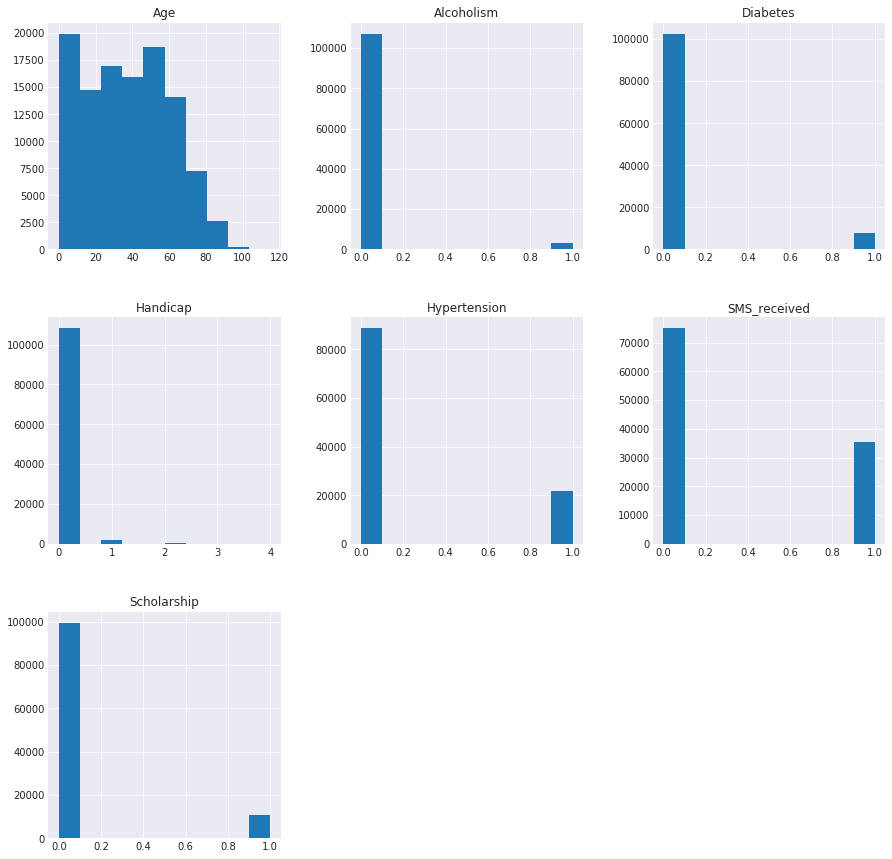

In [99]:
df.hist(figsize=(15, 15));

In [100]:
values = df['arrived'].value_counts()
values

arrived    88208
did not    22319
Name: arrived, dtype: int64

In [101]:
def visual(x, y, tit):
    """
    This function is an easy shortcut to aviod writing 
    these 3 lines of code in all of the upcoming visualization
    x: refers to xlabel
    y: refers to ylabel
    tit: refers to title
    """
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.title(tit, fontsize=18);

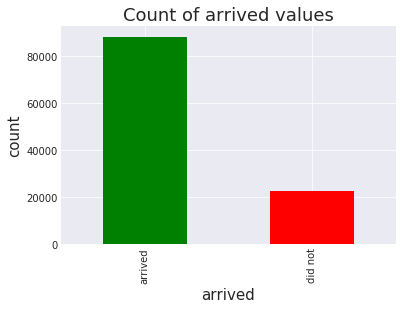

In [102]:
colors = ['green', 'red']
values.plot(kind='bar', color=colors)
visual('arrived', 'count', 'Count of arrived values')

Getting the number of patients who went to their appointment(88208 patients) and patients who didn't show up(22319 patients)

In [103]:
not_arrive_percent = 22319/110527*100
not_arrive_percent

20.193255946510806

That means nearly 20% of patients didn't show up for their appointment.

In [104]:
arrive = df['arrived'] == 'arrived'
not_arrive = df['arrived'] == 'did not'

In [105]:
arrive.mean()

0.79806744053489198

The mean of patients who came to their appointment is 0.79

In [106]:
not_arrive.mean()

0.20193255946510807

The mean of patients who didn't show up for their appointment is 0.2

In [107]:
gender_values = df['Gender'].value_counts()
gender_values

F    71840
M    38687
Name: Gender, dtype: int64

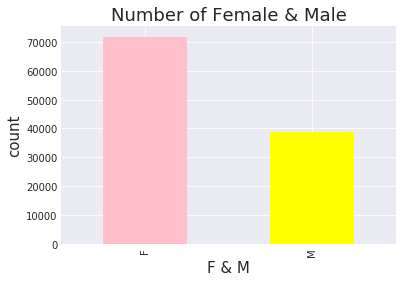

In [108]:
gender_values.plot(kind='bar', color=['pink', 'yellow'])
visual('F & M', 'count', 'Number of Female & Male')

In [109]:
male_percent = 38687/110527*100
female_percent = 71840/110527*100
male_percent, female_percent

(35.00230712857492, 64.99769287142509)

65% of all patients are females.
35% of all patients are males.

In [110]:
gender_arrive = df.groupby('Gender')['arrived'].value_counts()
gender_arrive

Gender  arrived
F       arrived    57246
        did not    14594
M       arrived    30962
        did not     7725
Name: arrived, dtype: int64

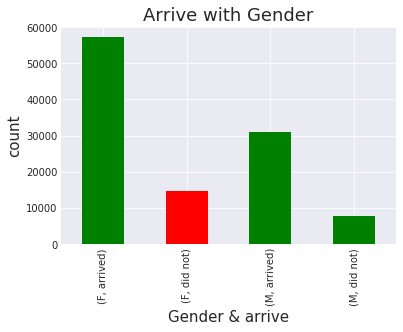

In [111]:
gender_arrive.plot(kind='bar', color=colors)
visual('Gender & arrive', 'count', 'Arrive with Gender')

In [112]:
female_no_show = 14594/71840*100
male_no_show = 7725/38687*100
female_no_show, male_no_show

(20.31458797327394, 19.967947889471915)

20.3% of females who took an appointment didn't show up.
19.96% of males who took an appointment didn't show up. 

In [113]:
female_per = (20.3/100) * (65/100) * 100
male_per = (19.97/100) * (35/100) * 100
female_per, male_per

(13.195, 6.989499999999999)

Out of 20% of patients who missed their appointment, 13.19% are females and 6.99% are males

In [114]:
scholarship_mean = df.groupby('arrived')['Scholarship'].mean()
scholarship_mean 

arrived
arrived    0.093903
did not    0.115507
Name: Scholarship, dtype: float64

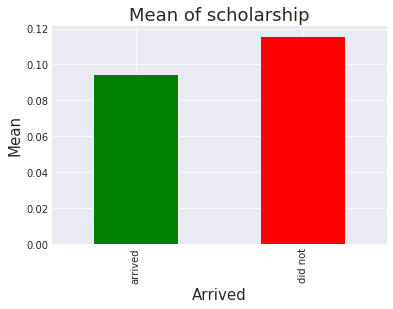

In [115]:
scholarship_mean.plot(kind='bar', color=colors)
visual('Arrived', 'Mean', 'Mean of scholarship')

Mean of patient's scholarship showing up is 0.09 whereas mean of patients not showing up is 0.12

In [116]:
scholarship = df['Scholarship'].value_counts()
scholarship

0    99666
1    10861
Name: Scholarship, dtype: int64

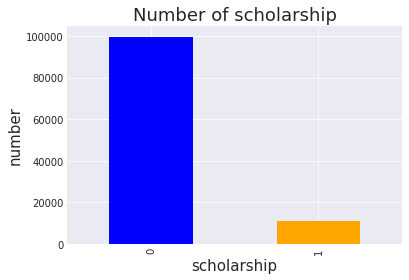

In [117]:
scholarship.plot(kind='bar', color=['blue', 'orange'])
visual('scholarship', 'number', 'Number of scholarship')

In [118]:
scholar_arrive = 10861/110527*100
scholar_not_arrive = 99666/110527*100
scholar_arrive, scholar_not_arrive

(9.826558216544374, 90.17344178345562)

10861(9.8%) of patients have a scholarship.
99666(90.17%) of patients don't have a scholarship.

In [119]:
scholarship_values = df.groupby('Scholarship')['arrived'].value_counts()
scholarship_values

Scholarship  arrived
0            arrived    79925
             did not    19741
1            arrived     8283
             did not     2578
Name: arrived, dtype: int64

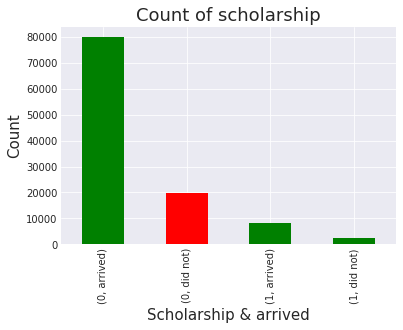

In [120]:
scholarship_values.plot(kind='bar', color=colors)
visual('Scholarship & arrived', 'Count', 'Count of scholarship')

In [121]:
no_scholar_not_arrive = 19741/99666*100
scholar_not_arrive = 2578/10861*100
no_scholar_not_arrive, scholar_not_arrive

(19.807155900708366, 23.73630420771568)

patients who didn't have a scholarship miss their appointment by 19.8%
patients who have a scholarship miss their appointment by 23.7%

In [122]:
scholar_percent = (23.7/100) * (9.8/100) * 100
no_scholar_percent= (19.8/100) * (90.17/100) * 100
scholar_percent, no_scholar_percent

(2.3226, 17.85366)

Out of the 20% of all patients missing their appointment, patients who received a scholarship are 2.3% while patients who didn't receive a scholarship are 17.855%

In [123]:
scholar = (2.3/100) / (20/100) *100
no_scholar = (17.855/100) / (20/100) * 100
scholar, no_scholar

(11.5, 89.275)

Out of patients who missed their appointments, 89.275% don't have a scholarship. 

In [124]:
hyper_mean = df.groupby('arrived')['Hypertension'].mean()
hyper_mean

arrived
arrived    0.204392
did not    0.169004
Name: Hypertension, dtype: float64

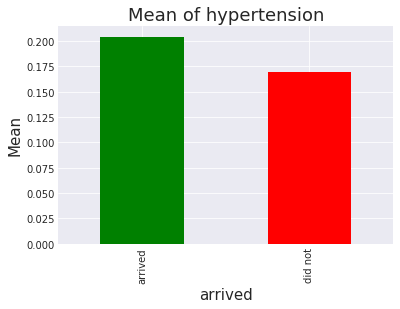

In [125]:
hyper_mean.plot(kind='bar', color=colors)
visual('arrived', 'Mean', 'Mean of hypertension')

Mean of patients who have hypertension showing up is 0.2 while mean of not showing up is 0.16

In [126]:
hypertension = df['Hypertension'].value_counts()
hypertension

0    88726
1    21801
Name: Hypertension, dtype: int64

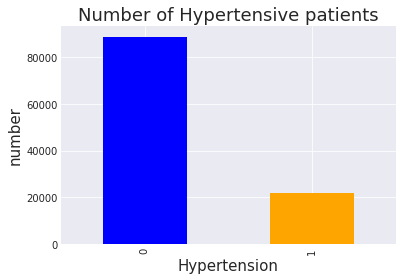

In [127]:
hypertension.plot(kind='bar', color=['blue', 'orange'])
visual('Hypertension', 'number', 'Number of Hypertensive patients')

In [128]:
no_hyper = 88726/110527*100
hyper = 21801/110527*100
no_hyper, hyper

(80.27540781890397, 19.72459218109602)

Out of all patients who scheduled appointments, 19.7% are hypertensive. 

In [129]:
hyper_values = df.groupby('Hypertension')['arrived'].value_counts()
hyper_values

Hypertension  arrived
0             arrived    70179
              did not    18547
1             arrived    18029
              did not     3772
Name: arrived, dtype: int64

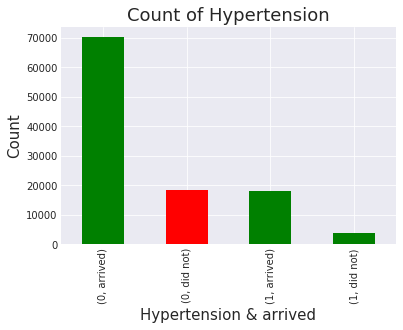

In [130]:
hyper_values.plot(kind='bar', color=colors)
visual('Hypertension & arrived', 'Count', 'Count of Hypertension')

In [131]:
no_hyper_not_arrive = 18547/88726*100
hyper_not_arrive = 3772/21801*100
no_hyper_not_arrive, hyper_not_arrive

(20.903680995424114, 17.301958625751112)

patients who don't have hypertension miss their appointment by 20.9% while patients who have hypertension miss their appointment by 17.3%.

In [132]:
diabetes_mean = df.groupby('arrived')['Diabetes'].mean()
diabetes_mean

arrived
arrived    0.073837
did not    0.064071
Name: Diabetes, dtype: float64

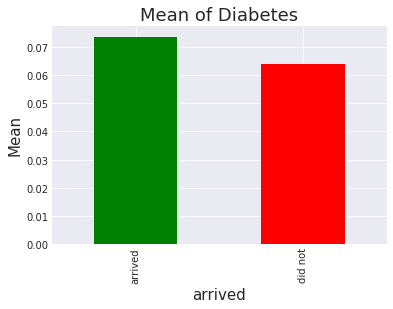

In [133]:
diabetes_mean.plot(kind='bar', color=colors)
visual('arrived', 'Mean', 'Mean of Diabetes')

Mean of patients who have diabetes showing up is 0.07 while mean of not showing up is 0.06

In [134]:
diabetes = df['Diabetes'].value_counts()
diabetes

0    102584
1      7943
Name: Diabetes, dtype: int64

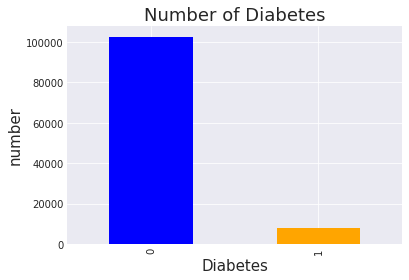

In [135]:
diabetes.plot(kind='bar', color=['blue', 'orange'])
visual('Diabetes', 'number', 'Number of Diabetes')

In [136]:
diabetes_count = 7943/110527*100
no_diabetes_count = 102584/110527*100
diabetes_count, no_diabetes_count

(7.186479321794674, 92.81352067820534)

7.19% of all patients are diabetic.

In [137]:
diabetes_values = df.groupby('Diabetes')['arrived'].value_counts()
diabetes_values

Diabetes  arrived
0         arrived    81695
          did not    20889
1         arrived     6513
          did not     1430
Name: arrived, dtype: int64

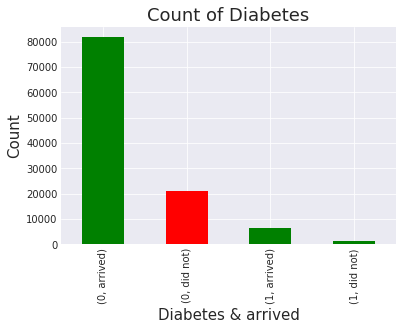

In [138]:
diabetes_values.plot(kind='bar', color=colors)
visual('Diabetes & arrived', 'Count', 'Count of Diabetes')

In [139]:
no_diabetes_not_arrived = 20889/102584*100
diabetes_not_arrived = 1430/7943*100
no_diabetes_not_arrived, diabetes_not_arrived

(20.362824612025268, 18.00327332242226)

Diabetic patients who missed their appointment are 18%

In [140]:
alcohol_mean = df.groupby('arrived')['Alcoholism'].mean()
alcohol_mean

arrived
arrived    0.030417
did not    0.030333
Name: Alcoholism, dtype: float64

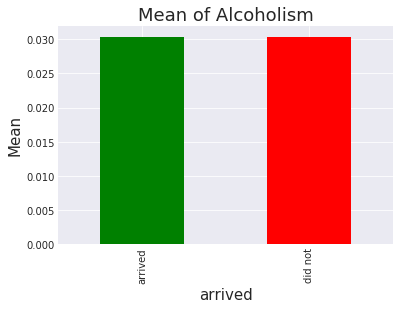

In [141]:
alcohol_mean.plot(kind='bar', color=colors)
visual('arrived', 'Mean', 'Mean of Alcoholism')

Mean of patients who drink alcohol showing up is 0.03 while mean of not showing up is 0.03

In [142]:
alcoholism = df['Alcoholism'].value_counts()
alcoholism

0    107167
1      3360
Name: Alcoholism, dtype: int64

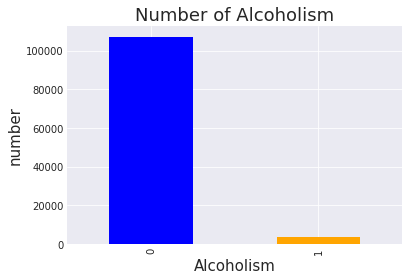

In [143]:
alcoholism.plot(kind='bar', color=['blue', 'orange'])
visual('Alcoholism', 'number', 'Number of Alcoholism')

In [144]:
alcohol = 3360/110527*100
no_alcohol = 107167/110527*100
alcohol, no_alcohol

(3.039981181068879, 96.96001881893113)

Patients who drink alcohol are 3% of all patients

In [145]:
alcohol_values = df.groupby('Alcoholism')['arrived'].value_counts()
alcohol_values

Alcoholism  arrived
0           arrived    85525
            did not    21642
1           arrived     2683
            did not      677
Name: arrived, dtype: int64

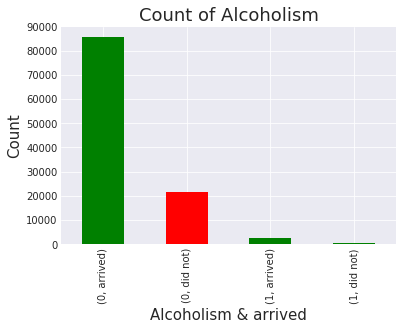

In [146]:
alcohol_values.plot(kind='bar', color=colors)
visual('Alcoholism & arrived', 'Count', 'Count of Alcoholism')

In [147]:
no_alcohol_not_arrive = 21642/107167*100
alcohol_not_arrive = 677/3360*100
no_alcohol_not_arrive, alcohol_not_arrive

(20.194649472318904, 20.148809523809526)

Patients who drink alcohol missed their appointment by 20.14%.
This means drinking alcohol have nearly no effect on showing for the medical appointment.

In [148]:
handicap_mean = df.groupby('arrived')['Handicap'].mean()
handicap_mean

arrived
arrived    0.022742
did not    0.020297
Name: Handicap, dtype: float64

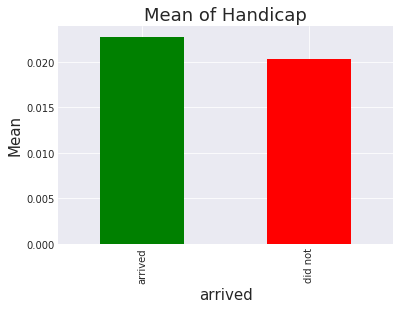

In [149]:
handicap_mean.plot(kind='bar', color=colors)
visual('arrived', 'Mean', 'Mean of Handicap')

Mean of patients who are handicap showing up is 0.023 while mean of not showing up is 0.02

In [150]:
handicap = df['Handicap'].value_counts()
handicap

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

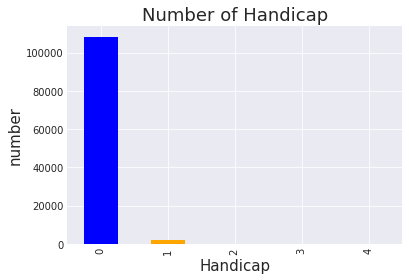

In [151]:
handicap.plot(kind='bar', color=['blue', 'orange'])
visual('Handicap', 'number', 'Number of Handicap')

In [152]:
no_handicap = 108286/110527*100
handicap = (2042+183+13+3)/110527*100
no_handicap, handicap

(97.97244112298353, 2.0275588770164754)

Handicap patients are 2% of all patients

In [153]:
handicap_values = df.groupby('Handicap')['arrived'].value_counts()
handicap_values

Handicap  arrived
0         arrived    86374
          did not    21912
1         arrived     1676
          did not      366
2         arrived      146
          did not       37
3         arrived       10
          did not        3
4         arrived        2
          did not        1
Name: arrived, dtype: int64

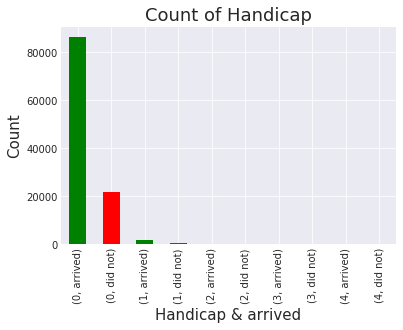

In [154]:
handicap_values.plot(kind='bar', color=colors)
visual('Handicap & arrived', 'Count', 'Count of Handicap')

In [155]:
no_handicap_not_arrive = 21912/108286*100
handicap_not_arrive = 407/2241*100
no_handicap_not_arrive, handicap_not_arrive

(20.235302809227417, 18.16153502900491)

In [156]:
handicap_percent = (18.16/100) * (2.03/100) * 100
no_handicap_percent = (20.25/100) * (97.97/100) * 100
handicap_percent, no_handicap_percent

(0.368648, 19.838925000000003)

Out of the 20% of patients who didn't show up, 0.36% are handicap.
handicap nearly have no effect on patients who didn't show up

In [157]:
sms_mean = df.groupby('arrived')['SMS_received'].mean()
sms_mean

arrived
arrived    0.291334
did not    0.438371
Name: SMS_received, dtype: float64

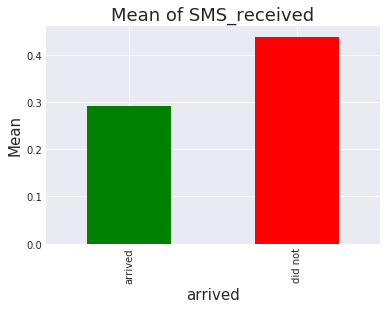

In [158]:
sms_mean.plot(kind='bar', color=colors)
visual('arrived', 'Mean', 'Mean of SMS_received')

Mean of patients who received a sms showing up is 0.29 while mean of not showing up is 0.44

In [159]:
sms = df['SMS_received'].value_counts()
sms

0    75045
1    35482
Name: SMS_received, dtype: int64

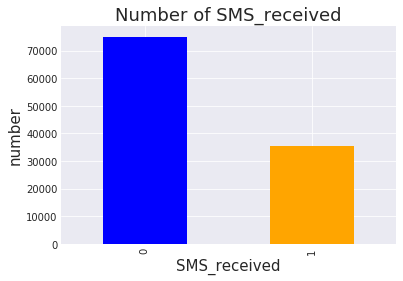

In [160]:
sms.plot(kind='bar', color=['blue', 'orange'])
visual('SMS_received', 'number', 'Number of SMS_received')

In [161]:
no_sms = 75045/110527*100
sms = 35482/110527*100
no_sms, sms

(67.89743682539108, 32.10256317460892)

Only 32.1% of patients received sms

In [162]:
sms_values = df.groupby('SMS_received')['arrived'].value_counts()
sms_values

SMS_received  arrived
0             arrived    62510
              did not    12535
1             arrived    25698
              did not     9784
Name: arrived, dtype: int64

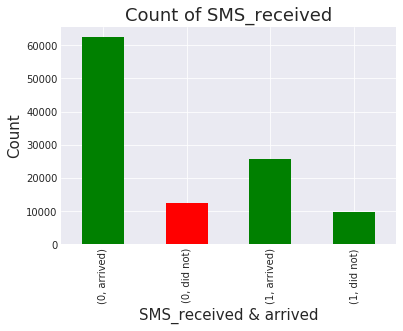

In [163]:
sms_values.plot(kind='bar', color=colors)
visual('SMS_received & arrived', 'Count', 'Count of SMS_received')

In [164]:
sms_not_arrived = 9784/35482*100
no_sms_not_arrived = 12535/75045*100
sms_not_arrived, no_sms_not_arrived

(27.574544839637, 16.703311346525417)

In [165]:
sms_percent = (27.57/100) * (32.1/100) * 100
no_sms_percent = (16.7/100) * (67.9/100) * 100
sms_percent, no_sms_percent

(8.84997, 11.3393)

In [166]:
difference = 11.3393-8.84997
difference

2.489329999999999

out of the 20% who didn't show up, 8.8% received sms and 11.33% didn't received sms. 

This means patients who didn't receive a message are more likely to miss their appointment by 2.49% than patients who received it

In [167]:
8.8/2, 11.33/2

(4.4, 5.665)

Out of 20% who didn't show up, 8.8% received sms and 11.33% did't receive sms. That means patients who received sms miss their appointment 4 times out of 10 while patients who didn't receive sms miss it 6 times out of 10.

In [168]:
age_mean = df.groupby('arrived')['Age'].mean()
age_mean

arrived
arrived    37.790087
did not    34.317667
Name: Age, dtype: float64

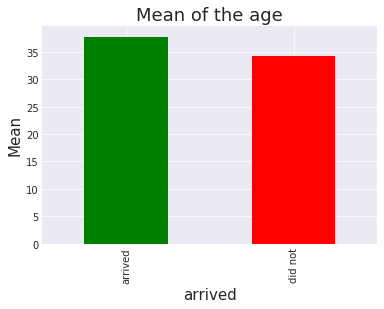

In [169]:
age_mean.plot(kind='bar', color=colors)
visual('arrived', 'Mean', 'Mean of the age')

Mean for patient's age who show for their appointment is 37.79 and for patients who did't show for their appointment is 34.3

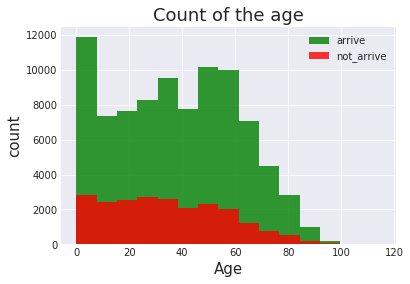

In [170]:
df.Age[arrive].hist(alpha=0.8, bins=15, label='arrive', color='green')
df.Age[not_arrive].hist(alpha=0.8, bins=15, label='not_arrive', color='red')
visual('Age', 'count', 'Count of the age')
plt.legend();

Most patients who didn't show up exist between 20-40 years old

<a id='conclusions'></a>
## Conclusions & Recommendations:


1. Out of patients who missed their appointments, 89.275% don't have a scholarship.
Offerning more scholarships will decrease the the likelyhood to miss the scheduled appointment. 
2. patients who received sms miss their appointment 4 times out of 10 while patients who didn't receive sms miss it 6 times out of 10.


Furthur invistgation should be done as this is a correlation not causation relationship between not showing and not receiving sms. Additionally, there is a limitation here as not all information are given about sms. For example, when this sms was sent to patients, the reason why some patients received messages and others didn't.

In [171]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0